In [1]:
!pip install matplotlib

  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.8 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 3.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.1 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data=np.loadtxt("perceptron_toydata.txt", delimiter='\t')

In [62]:
X=data[:,:2]
y=data[:,2]
y=y.astype(np.int32)

In [63]:
print("X: ",X[:5])
print("y: ",y[:5])

print("labels count: ", np.bincount(y))
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X:  [[ 0.77 -1.14]
 [-0.33  1.44]
 [ 0.91 -3.07]
 [-0.37 -1.91]
 [-1.84 -1.13]]
y:  [0 0 0 0 0]
labels count:  [50 50]
X shape:  (100, 2)
y shape:  (100,)


In [ ]:
indices=np.random.RandomState(seed=42).permutation(len(y)) # gettig random indices is different.
X_shuffle,y_shuffle=X[indices],y[indices]


In [65]:
print("X: ",X_shuffle[:5])
print("y: ",y_shuffle[:5])

X:  [[ 1.    0.46]
 [ 1.59  1.25]
 [ 0.51  2.44]
 [-2.26  0.01]
 [-3.2  -0.22]]
y:  [1 1 1 0 0]


In [71]:
X_train,X_test=X_shuffle[:70],X_shuffle[70:]
y_train,y_test=y_shuffle[:70],y_shuffle[70:]

In [74]:
#standarization of data: extracting mean and divide by standard deviation
mu_train, sigma_train=X_train.mean(axis=0),X_train.std(axis=0)
mu_test, sigma_test=X_test.mean(axis=0),X_test.std(axis=0)

X_train=(X_train-mu_train)/sigma_train
X_test=(X_test-mu_test)/sigma_test

# mu, sigma=X.mean(axis=0),X.std(axis=0)
# X_train=(X_train-mu)/sigma
# X_test=(X_test-mu)/sigma



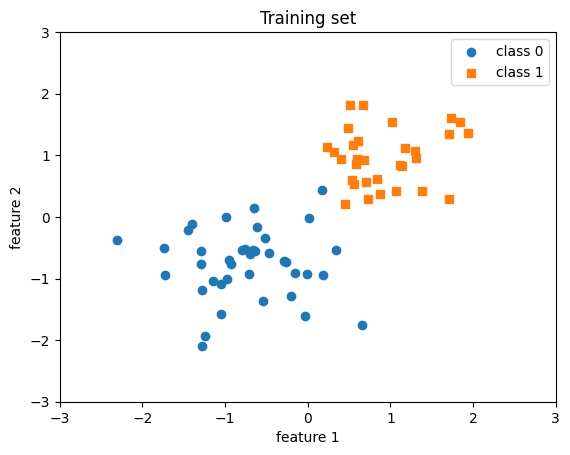

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')

plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

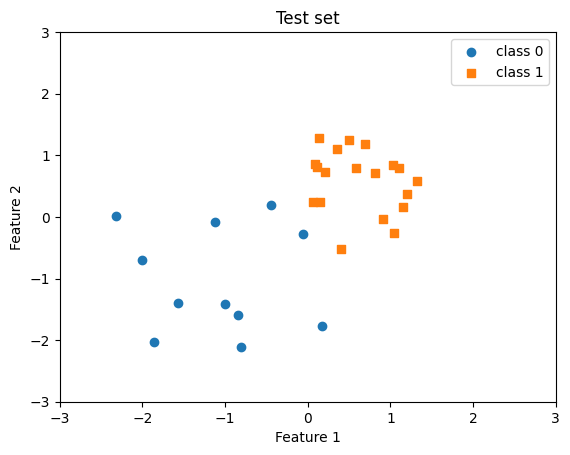

In [81]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [ ]:
class Perceptron():
    def __init__(self, num_features=2):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float32)
        self.bias = np.zeros(1, dtype=np.float32)

    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias # z=(X.w)+b
        print("z : ",z)
        predictions = np.where(z > 0., 1, 0)
        print("predictions : ",predictions)

        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs=5):
        for _ in range(epochs):
            
            for i,y_i in enumerate(y):
                errors = self.backward(x[i].reshape(1, self.num_features), y_i).reshape(-1)
                if errors[0]==0:
                    break

                print("errors  : ",errors)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                print("weights  : ",self.weights)
                print("weights shape : ",self.weights.shape)

                
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / len(y)
        return accuracy

In [94]:
percep_obj=Perceptron()
percep_obj.train(X_train,y_train,5)

z :  [[0.]]
predictions :  [[0]]
errors  :  [1]
weights  :  [[0.44778267]
 [0.20362468]]
weights shape :  (2, 1)
z :  [[1.43312155]]
predictions :  [[1]]
errors  :  [0]
weights  :  [[0.44778267]
 [0.20362468]]
weights shape :  (2, 1)
z :  [[1.33382888]]
predictions :  [[1]]
errors  :  [0]
weights  :  [[0.44778267]
 [0.20362468]]
weights shape :  (2, 1)
z :  [[0.55798922]]
predictions :  [[1]]
errors  :  [-1]
weights  :  [[1.4319508 ]
 [0.21009424]]
weights shape :  (2, 1)
z :  [[-2.02444333]]
predictions :  [[0]]
errors  :  [0]
weights  :  [[1.4319508 ]
 [0.21009424]]
weights shape :  (2, 1)
z :  [[-1.49504502]]
predictions :  [[0]]
errors  :  [0]
weights  :  [[1.4319508 ]
 [0.21009424]]
weights shape :  (2, 1)
z :  [[-1.73255101]]
predictions :  [[0]]
errors  :  [0]
weights  :  [[1.4319508 ]
 [0.21009424]]
weights shape :  (2, 1)
z :  [[1.3388397]]
predictions :  [[1]]
errors  :  [0]
weights  :  [[1.4319508 ]
 [0.21009424]]
weights shape :  (2, 1)
z :  [[-3.38136644]]
predictions :  [

In [95]:
print("Weights: ",percep_obj.weights)
print("bias: ",percep_obj.bias)


Weights:  [[1.8890202]
 [1.4958044]]
bias:  [-1.]


In [96]:
test_acc=percep_obj.evaluate(X_test,y_test)

z :  [[-0.34912451]
 [-5.66677195]
 [ 1.81643721]
 [-3.24282044]
 [ 2.28468248]
 [ 1.28949664]
 [ 2.0710201 ]
 [-5.00902297]
 [ 1.32756784]
 [ 2.19870682]
 [ 1.81277394]
 [ 2.35569437]
 [-4.97676746]
 [-6.05305914]
 [-1.54165025]
 [ 1.18198611]
 [-5.35955523]
 [-3.30779426]
 [-5.82321476]
 [ 0.49361269]
 [-1.02673048]
 [-0.52269519]
 [ 1.41232524]
 [ 0.40893721]
 [-7.56466707]
 [ 0.66595342]
 [ 1.60082458]
 [-1.50839036]
 [ 0.57641983]
 [ 0.45582558]]
predictions :  [[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [105]:
print(f"accuracy :  {test_acc:.2f}")

accuracy :  0.90


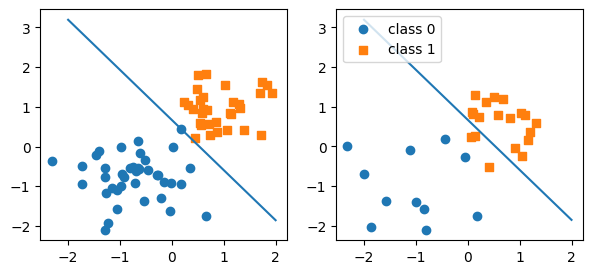

In [ ]:
w, b = percep_obj.weights, percep_obj.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )



fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()